<div style="border: solid green 2px; padding: 20px">

  <b>Overall Summary of the Project – Iteration 1</b><br><br>
  Hello Ivey, congratulations on submitting your project!<br>

  My name is <b>Victor Camargo</b> 
  (<a href="https://hub.tripleten.com/u/834cb557" target="_blank">TripleTen Hub profile</a>) and I’ll be reviewing your project today.<br>

  <i>You can find my detailed feedback throughout the notebook, starting with comments labeled 
  <b>“Reviewer’s comment – Iteration 1”</b>.</i><br>

  <b>What you did well:</b><br>
  ✅ Clear exploratory data analysis and correct use of ImageDataGenerator generators to avoid loading all images into memory; functions are defined with the required signatures and a sensible ResNet50 backbone is used.<br>

  <b>Required fixes (only if red issues exist):</b><br>
  ⛔️ None<br>

  <b>Project Status:</b><br>
  <div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
    <b>Approved</b>
  </div>

  <hr><b>Legend:</b><br>

  <div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
  <b>✅ Reviewer’s comment – Iteration 1:</b><br>
  Strong, correct solutions or good practices worth reusing.
  </div>

  <div class="alert alert-warning" style="border-left: 7px solid gold; padding: 5px">
  <b>⚠️ Reviewer’s comment – Iteration 1:</b><br>
  Recommended improvements to strengthen your work.
  </div>

  <div class="alert alert-danger" style="border-left: 7px solid red; padding: 5px">
  <b>⛔️ Reviewer’s comment – Iteration 1:</b><br>
  Required fixes. The project cannot be approved until these are addressed.
  </div>

  <div class="alert alert-info" style="border-left: 7px solid blue; padding: 5px">
  <b>Student’s Comment</b><br>
  You may add your own notes or explanations in a <b>Markdown cell</b> using:<br>
  <code>&lt;div class="alert alert-info" style="border-left: 7px solid blue"&gt;&lt;b&gt;Student’s Comment&lt;/b&gt;&lt;/div&gt;</code>
  </div>

  <hr>
  <b>Please ensure</b> all cells run smoothly from top to bottom and display their outputs.<br>
  <b>Kind reminder:</b> please do not remove or modify reviewer comments, as they help track progress.<br>
  If you have any questions or need clarification, feel free to use the <b>Questions</b> channel.

</div>

## Initialization

In [1]:
# NEVER EVER DELETE THIS CELL

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255.)

labels = pd.read_csv('/datasets/faces/labels.csv')

train_datagen = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/datasets/faces/final_files',
    x_col='file_name',
    y_col='real_age',
    target_size=(150, 150),
    batch_size=16,
    class_mode='raw',
    subset='training',
    seed=12345
)

val_datagen = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/datasets/faces/final_files',
    x_col='file_name',
    y_col='real_age',
    target_size=(150, 150),
    batch_size=16,
    class_mode='raw',
    subset='validation',
    seed=12345
)

Found 5694 validated image filenames.
Found 1897 validated image filenames.


<div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
  <b>✅ Reviewer’s comment – Iteration 1:</b><br>
  Good job creating the training and validation generators with ImageDataGenerator and flow_from_dataframe. You rescaled pixel values and used validation_split and a fixed seed, which keeps the data pipeline reproducible and avoids loading all images into memory. The numbers of validated filenames match the dataset size, which indicates the generators are configured correctly.
</div>

In [3]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


## EDA

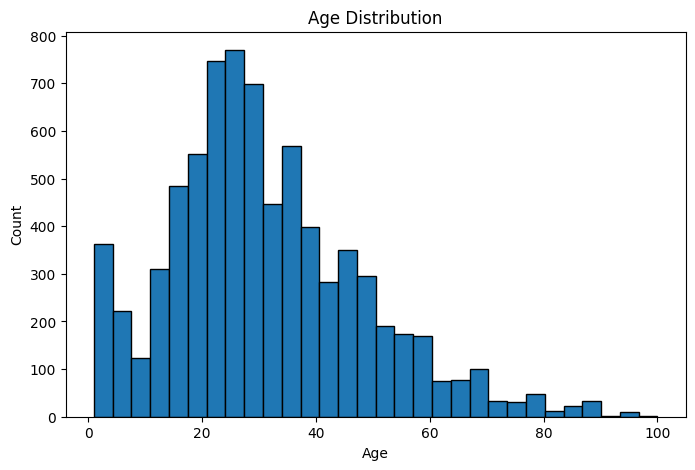

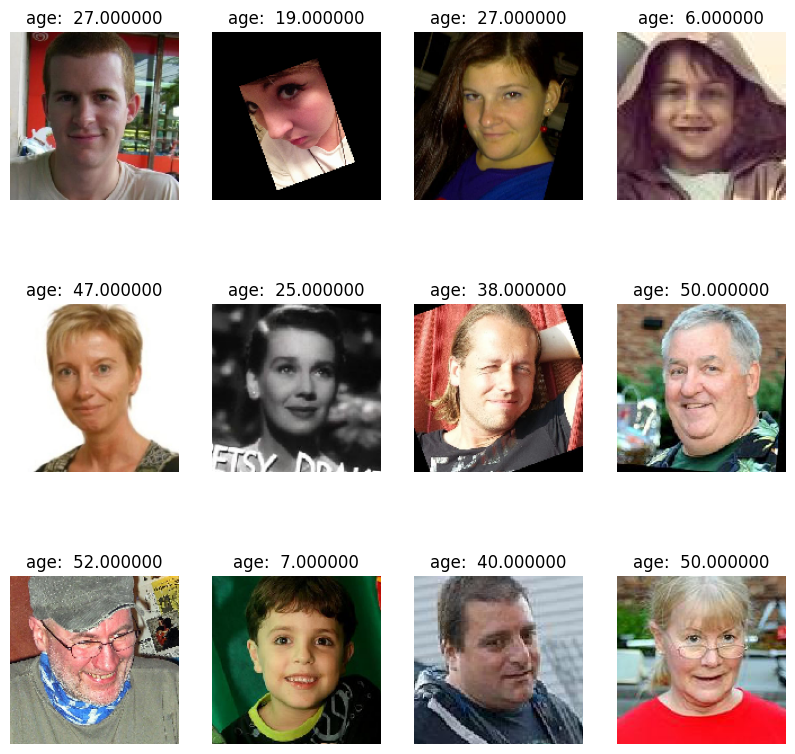

In [4]:
plt.figure(figsize=(8, 5))
plt.hist(labels['real_age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

images, ages = next(train_datagen)

plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i])
    plt.title(f'age: {ages[i]: 0f}')
    plt.axis('off')
plt.show()

### Findings

In [5]:
age = labels['real_age']
print(f' Age Mean {age.mean()}')
print(labels.describe())
five_threshold = labels['real_age'].quantile(.05)
ninetyfive_threshold = labels['real_age'].quantile(.95)
one_threshold = labels['real_age'].quantile(.01)
ninetynine_threshold = labels['real_age'].quantile(.99)

print(f'Upper 95% Threshold: {ninetyfive_threshold}, Lower 5% Threshold: {five_threshold} ')
print(f'Upper 99% Threshold: {ninetynine_threshold}, Lower 1% Threshold: {one_threshold} ')

 Age Mean 31.20115926755368
          real_age
count  7591.000000
mean     31.201159
std      17.145060
min       1.000000
25%      20.000000
50%      29.000000
75%      41.000000
max     100.000000
Upper 95% Threshold: 63.0, Lower 5% Threshold: 5.0 
Upper 99% Threshold: 82.0, Lower 1% Threshold: 1.0 


## 3.1 Findings

The dataset contains **7,591 labeled images** with ages ranging from **1 to 100 years**.

### Central Tendency and Spread

- **Mean age:** 31.2 years  
- **Median (50th percentile):** 29 years  
- **Standard deviation:** 17.15  
- **Minimum age:** 1  
- **Maximum age:** 100  

The dataset is centered around young adults. The mean and median are close in value, indicating that the overall distribution is not heavily skewed.

The interquartile range (25%–75%) spans from **20 to 41 years**, meaning that 50% of the data lies within this relatively narrow range.

### Lower Tail Analysis

- **5th percentile:** 5 years  
- **1st percentile:** 1 year  

This indicates that younger ages are present but limited. However, they are not extremely distant from the central distribution, and the lower tail does not appear to distort the mean significantly.

### Upper Tail Analysis

- **95th percentile:** 63 years  
- **99th percentile:** 82 years  

While the dataset includes ages up to 100 years, values above 80 are rare. The upper tail extends farther from the central age range (20–41), which may create challenges during model training.

---

## Implications for Model Training

Since this is a regression task:

1. The model will likely perform best in the dense age range (20–41).
2. Predictions for elderly individuals (especially above 80) may be less accurate due to limited representation.
3. The model may exhibit regression-to-the-mean behavior, especially for extreme ages.
4. The upper tail is more sparse than the lower tail, making high-age predictions potentially less stable.

Overall, the dataset is moderately balanced in younger ages but becomes sparse in the higher age range, which may affect generalization performance for older individuals.

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [6]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [7]:
def load_train(path):
    """
    Loads the training part of dataset from path
    """

    labels = pd.read_csv(path + 'labels.csv')

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.25
    )

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345
    )

    return train_gen_flow


In [8]:

def load_test(path):
    """
    Loads the validation/test part of dataset from path
    """

    labels = pd.read_csv(path + 'labels.csv')

    test_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.25
    )

    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345
    )

    return test_gen_flow

In [9]:
def create_model(input_shape):

    backbone = ResNet50(
        input_shape=input_shape,
        weights='imagenet',
        include_top=False
    )

    backbone.trainable = False

    model = Sequential([
        backbone,
        GlobalAveragePooling2D(),
        Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='mse',
        metrics=['mae']
    )

    return model

<div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
  <b>✅ Reviewer’s comment – Iteration 1:</b><br>
  The create_model function is well structured. Using a pretrained ResNet50 backbone, freezing its weights, adding global average pooling and a single linear output node is appropriate for age regression. The model is compiled with mean squared error loss and mean absolute error metric, which fits the regression objective.
</div>

In [10]:
def train_model(model, train_data, test_data,
                batch_size=None, epochs=20,
                steps_per_epoch=None,
                validation_steps=None):

    model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=1
    )

    return model

<div class="alert alert-warning" style="border-left: 7px solid gold; padding: 5px">
  <b>⚠️ Reviewer’s comment – Iteration 1:</b><br>
  Small suggestions to make the training function more informative when you or others run it. When passing generator objects to model.fit, the batch_size parameter is typically ignored, so you can omit it to avoid confusion. It is helpful to return the History object from train_model so you can inspect training curves programmatically. Consider returning model.fit(...) directly, or capturing and returning the history.
</div>

### Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [11]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

```
Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921
Epoch 2/20
356/356 - 35s - loss: 76.8372 - mae: 6.6707 - val_loss: 127.6357 - val_mae: 8.6035
Epoch 3/20
356/356 - 35s - loss: 69.9428 - mae: 6.3992 - val_loss: 91.1531 - val_mae: 7.4454
Epoch 4/20
356/356 - 35s - loss: 64.4249 - mae: 6.1407 - val_loss: 124.0287 - val_mae: 8.3481
Epoch 5/20
356/356 - 35s - loss: 52.8486 - mae: 5.5913 - val_loss: 109.1004 - val_mae: 8.2192
Epoch 6/20
356/356 - 35s - loss: 46.3094 - mae: 5.2223 - val_loss: 85.1038 - val_mae: 7.0332
Epoch 7/20
356/356 - 35s - loss: 38.2617 - mae: 4.7951 - val_loss: 92.0900 - val_mae: 7.3359
Epoch 8/20
356/356 - 35s - loss: 37.4804 - mae: 4.7402 - val_loss: 80.0016 - val_mae: 6.7239
Epoch 9/20
356/356 - 35s - loss: 33.5237 - mae: 4.4271 - val_loss: 83.2579 - val_mae: 6.8529
Epoch 10/20
356/356 - 35s - loss: 28.5170 - mae: 4.1411 - val_loss: 83.5056 - val_mae: 6.9629
Epoch 11/20
356/356 - 35s - loss: 27.0142 - mae: 3.9700 - val_loss: 92.1290 - val_mae: 7.1866
Epoch 12/20
356/356 - 35s - loss: 27.4564 - mae: 4.0428 - val_loss: 185.6307 - val_mae: 11.4591
Epoch 13/20
356/356 - 35s - loss: 23.7961 - mae: 3.7407 - val_loss: 92.3429 - val_mae: 7.2467
Epoch 14/20
356/356 - 35s - loss: 24.6167 - mae: 3.8116 - val_loss: 92.4542 - val_mae: 7.1401
Epoch 15/20
356/356 - 35s - loss: 22.2604 - mae: 3.6746 - val_loss: 82.5822 - val_mae: 6.7841
Epoch 16/20
356/356 - 35s - loss: 20.1899 - mae: 3.4430 - val_loss: 86.3830 - val_mae: 6.8304
Epoch 17/20
356/356 - 35s - loss: 17.3425 - mae: 3.2205 - val_loss: 78.4369 - val_mae: 6.6419
Epoch 18/20
356/356 - 35s - loss: 16.5249 - mae: 3.1295 - val_loss: 81.7731 - val_mae: 6.7226
Epoch 19/20
356/356 - 35s - loss: 16.6140 - mae: 3.1421 - val_loss: 80.9727 - val_mae: 6.9908
Epoch 20/20
356/356 - 35s - loss: 17.0187 - mae: 3.1785 - val_loss: 93.4115 - val_mae: 7.6512
```

## Conclusions

## 7. Conclusions

The model began training with relatively close performance between the training and validation sets.

- **Epoch 1:**
  - Training MAE: 7.43  
  - Validation MAE: 8.49  

At this stage, there was nothing concerning. The metrics were aligned, and the model was beginning to learn meaningful patterns.

As training progressed, the training MAE steadily decreased, eventually reaching **3.18 by epoch 20**. However, the validation MAE did not decrease at the same rate and fluctuated throughout training. The lowest validation MAE achieved was approximately **6.64–6.78**, occurring between epochs 15–17. By the final epoch, validation MAE increased to **7.65**, while training MAE continued to decrease.

This widening gap between training and validation performance indicates **moderate overfitting**. The model continued improving on the training data but did not generalize at the same rate to unseen data. Additionally, the final training loss (17.01) compared to the validation loss (93.41) further supports this conclusion, as the discrepancy is significant.

A validation MAE of **7.6 years** means that, on average, the model's age predictions are off by approximately 7–8 years. While this is not catastrophic for an initial deep learning baseline, it is not optimal and suggests room for improvement.

Based on the observed trends, the optimal stopping point likely occurred earlier than epoch 20. Validation performance began plateauing and fluctuating before the final epoch, suggesting that early stopping around epochs 15–17 would likely have resulted in better generalization. Early stopping could be implemented by monitoring validation loss or validation MAE and defining a threshold or patience parameter to halt training when improvement stagnates.

Earlier exploratory data analysis showed that:

- The majority of ages fall between 20–41.
- Representation becomes sparse above 60.
- Representation is very sparse above 80.

Given this imbalance, the model likely learned the dominant age clusters effectively but struggled with underrepresented older age samples. This imbalance may contribute to generalization issues, particularly in higher age ranges.

### Next Steps

To improve generalization:

- Increase the amount of training data.
- Apply image augmentation techniques to artificially expand the dataset.
- Focus on strategies that help the model generalize better rather than removing outliers, as dropping sparse age groups is not appropriate in this case.

Overall, the model demonstrates learning capability but shows moderate overfitting. Improvements should focus on enhancing generalization rather than further reducing training error.


# Checklist

- [x]  Notebook was opened
- [x]  The code is error free
- [x]  The cells with code have been arranged by order of execution
- [x]  The exploratory data analysis has been performed
- [x]  The results of the exploratory data analysis are presented in the final notebook
- [x]  The model's MAE score is not higher than 8
- [x]  The model training code has been copied to the final notebook
- [x]  The model training output has been copied to the final notebook
- [x]  The findings have been provided based on the results of the model training